# Milestone Project: Food Vision Big

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_histories

## Use TensorFlow Datasets

In [2]:
import tensorflow_datasets as tfds

In [3]:
datasets_list = tfds.list_builders()
datasets_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [4]:
(train_data, test_data), ds_info = tfds.load(
    name="food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True, # data gets returned in tuple format
    with_info=True
)


In [5]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [6]:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the Food101 dataset

In [7]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [8]:
for image, label in train_one_sample:
    print(f"""
    Image shape: {image.shape}
    Image datatype: {image.dtype},
    Target class form Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>,
    Target class form Food101 (tensor form): 12
    Class name (str form): cannoli
    


In [9]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 82,  51,  49],
        [ 82,  51,  49],
        [ 83,  53,  53],
        ...,
        [118,  85,  70],
        [118,  85,  70],
        [120,  87,  72]],

       [[ 89,  58,  56],
        [ 86,  56,  54],
        [ 85,  55,  55],
        ...,
        [117,  84,  69],
        [119,  86,  71],
        [123,  90,  75]],

       [[ 87,  57,  57],
        [ 84,  56,  55],
        [ 80,  51,  53],
        ...,
        [117,  84,  67],
        [120,  87,  70],
        [125,  92,  75]],

       ...,

       [[ 49,  40,  41],
        [ 49,  40,  41],
        [ 50,  40,  41],
        ...,
        [ 80,  56,  52],
        [ 79,  55,  51],
        [ 77,  53,  49]],

       [[ 49,  40,  41],
        [ 49,  40,  41],
        [ 49,  40,  41],
        ...,
        [ 82,  58,  54],
        [ 80,  56,  52],
        [ 77,  53,  49]],

       [[ 54,  45,  46],
        [ 54,  45,  46],
        [ 54,  45,  46],
        ...,
        [ 87,  63,  5

In [10]:
import tensorflow as tf

tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=8>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

Text(0.5, 1.0, 'cannoli')

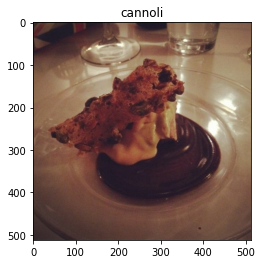

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread(image)
plt.imshow(image)
plt.title(class_names[label.numpy()])

## Create preprocessing functions

In [12]:
def preprocess_img(image, label, img_shape=224):
    image = tf.image.resize(image, [img_shape, img_shape])
    # image = image/255.
    return tf.cast(image, tf.float32), label


In [13]:
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype:{image.dtype}")
print(f"Image before preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape},\nDatatype:{preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 82  51  49]
  [ 82  51  49]
  [ 83  53  53]
  ...
  [118  85  70]
  [118  85  70]
  [120  87  72]]

 [[ 89  58  56]
  [ 86  56  54]
  [ 85  55  55]
  ...
  [117  84  69]
  [119  86  71]
  [123  90  75]]]..., 
Shape: (512, 512, 3),
Datatype:<dtype: 'uint8'>
Image before preprocessing:
 [[[ 85.2602    54.67347   52.67347 ]
  [ 83.755104  55.612244  54.68367 ]
  [ 77.591835  53.790817  54.295918]
  ...
  [118.867355  85.867355  70.867355]
  [120.142815  87.142815  72.142815]
  [119.816444  86.816444  71.816444]]

 [[ 72.668365  46.474487  47.35714 ]
  [ 66.73469   42.57653   42.653057]
  [ 61.168365  40.168365  39.168365]
  ...
  [123.699005  90.699005  73.699005]
  [120.846924  87.846924  70.846924]
  [122.9797    89.9797    72.9797  ]]]..., 
Shape: (224, 224, 3),
Datatype:<dtype: 'float32'>


## Batch & Prepare Datasets

In [14]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(
    map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE
)

# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = (
    train_data.shuffle(buffer_size=1000)
    .batch(batch_size=32)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Map preprocessing function to test data
test_data = (
    (test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE))
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)


In [15]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

# Create modelling callbacks

In [16]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "model_food_vision_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=0,
)


# Setup mixed precision training

In [17]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070, compute capability 7.5


## Build feature extraction model

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])
# Create base model
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32_layer")(
    x
)
model = tf.keras.Model(inputs, outputs)


# Compile the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)


In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32_layer (Activ (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_____________________________________________

In [20]:
for layer in model.layers[1].layers:
    print(layer.name, layer.dtype)

random_flip float32
random_rotation float32
random_height float32
random_width float32
random_zoom float32


In [21]:
initial_epochs=5

In [22]:
history_101_feature_extract = model.fit(
    train_data,
    epochs=initial_epochs,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback(
            "training_logs", "efficientnetb0_101_all_data_feature_extract"
        ),
        model_checkpoint,
    ],
)


Saving TensorBoard log files to: training_logs/efficientnetb0_101_all_data_feature_extract/20210816-151318
Epoch 1/5


C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


2368/2368 [==============================] - 172s 68ms/step - loss: 2.2214 - accuracy: 0.4664 - val_loss: 1.3945 - val_accuracy: 0.6316
Epoch 2/5
2368/2368 [==============================] - 136s 57ms/step - loss: 1.7375 - accuracy: 0.5610 - val_loss: 1.2879 - val_accuracy: 0.6570
Epoch 3/5
2368/2368 [==============================] - 130s 55ms/step - loss: 1.6141 - accuracy: 0.5892 - val_loss: 1.2474 - val_accuracy: 0.6671
Epoch 4/5
2368/2368 [==============================] - 127s 53ms/step - loss: 1.5450 - accuracy: 0.6025 - val_loss: 1.2060 - val_accuracy: 0.6825
Epoch 5/5
2368/2368 [==============================] - 125s 53ms/step - loss: 1.4948 - accuracy: 0.6140 - val_loss: 1.2047 - val_accuracy: 0.6803


In [23]:
results_feature_extractor = model.evaluate(test_data)
results_feature_extractor

790/790 [==============================] - 29s 37ms/step - loss: 1.2197 - accuracy: 0.6726


[1.2197489738464355, 0.6726336479187012]

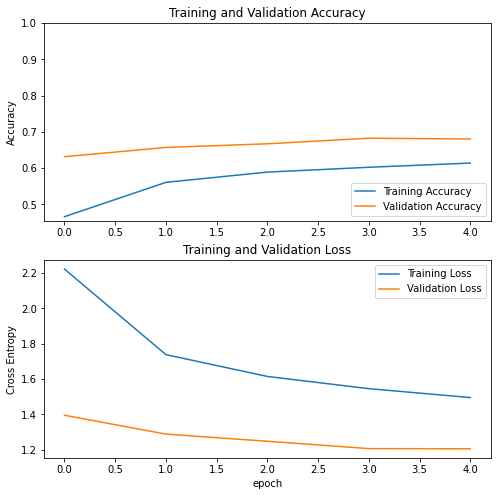

In [24]:
acc = history_101_feature_extract.history['accuracy']
val_acc = history_101_feature_extract.history['val_accuracy']

loss = history_101_feature_extract.history['loss']
val_loss = history_101_feature_extract.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  237


In [26]:
base_model.trainable = True

In [27]:
fine_tune_at = 200
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [28]:
for layer in base_model.layers:
  print(layer.trainable ==  True)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"],
)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32_layer (Activ (None, 101)               0         
Total params: 4,178,952
Trainable params: 2,124,741
Non-trainable params: 2,054,211
___________________________________________

In [31]:
len(model.trainable_variables)

36

In [32]:
fine_tune_epochs = 100
total_epochs =  initial_epochs + fine_tune_epochs

history_101_fine_tuning = model.fit(
    train_data,
    epochs=total_epochs,
    initial_epoch=history_101_feature_extract.epoch[-1],
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        create_tensorboard_callback(
            "training_logs", "efficientnetb0_101_all_data_feature_extract"
        ),
        model_checkpoint, reduce_lr, early_stopping
    ],
)


Saving TensorBoard log files to: training_logs/efficientnetb0_101_all_data_feature_extract/20210816-152520
Epoch 5/105
2368/2368 [==============================] - 173s 69ms/step - loss: 1.2976 - accuracy: 0.6603 - val_loss: 1.0277 - val_accuracy: 0.7166
Epoch 6/105
2368/2368 [==============================] - 155s 65ms/step - loss: 1.1221 - accuracy: 0.7011 - val_loss: 0.9834 - val_accuracy: 0.7315
Epoch 7/105
2368/2368 [==============================] - 153s 64ms/step - loss: 1.0091 - accuracy: 0.7284 - val_loss: 0.9444 - val_accuracy: 0.7376
Epoch 8/105
2368/2368 [==============================] - 150s 63ms/step - loss: 0.9116 - accuracy: 0.7499 - val_loss: 0.9451 - val_accuracy: 0.7458
Epoch 9/105
2368/2368 [==============================] - 150s 63ms/step - loss: 0.8229 - accuracy: 0.7717 - val_loss: 0.9387 - val_accuracy: 0.7511
Epoch 10/105
2368/2368 [==============================] - 151s 63ms/step - loss: 0.7522 - accuracy: 0.7898 - val_loss: 0.9361 - val_accuracy: 0.7460
Epoc

In [33]:
results_fine_tuning = model.evaluate(test_data)
results_fine_tuning

790/790 [==============================] - 29s 36ms/step - loss: 1.0177 - accuracy: 0.7430


[1.0176787376403809, 0.7430495023727417]

In [34]:
model.save("models/food_vision_fine_tuning.h5")

C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [35]:
saved_model = tf.keras.models.load_model("models/food_vision_fine_tuning.h5")

In [40]:
saved_model.evaluate(test_data)

790/790 [==============================] - 32s 38ms/step - loss: 1.5757 - accuracy: 0.6229


[1.5757144689559937, 0.6228910684585571]

In [41]:
saved_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32_layer (Activ (None, 101)               0         
Total params: 4,178,952
Trainable params: 2,124,741
Non-trainable params: 2,054,211
___________________________________________

In [42]:
saved_model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["sparse_categorical_accuracy"],
)

In [43]:
saved_model.evaluate(test_data)

790/790 [==============================] - 33s 38ms/step - loss: 1.5757 - accuracy: 0.6229


[1.5757131576538086, 0.6228910684585571]